<a href="https://www.kaggle.com/code/tarizatique/movies-recommendation-system-by-rating?scriptVersionId=106477184" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/Entertainment.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
movies = pd.read_csv("../input/movies/Entertainment.csv")

In [4]:
movies.head()

,Id,Titles,Category,Reviews
0,6973,Toy Story (1995),"Drama, Romance, School, Supernatural",-8.98
1,6778,Jumanji (1995),"Action, Adventure, Drama, Fantasy, Magic, Mili...",8.88
2,9702,Grumpier Old Men (1995),"Action, Comedy, Historical, Parody, Samurai, S...",99.00
3,6769,Waiting to Exhale (1995),"Sci-Fi, Thriller",99.00
4,1123,Father of the Bride Part II (1995),"Action, Comedy, Historical, Parody, Samurai, S...",-0.44


In [5]:
movies.shape

(51, 4)

In [6]:
movies.describe()

,Id,Reviews
count,51.000000,51.000000
mean,6351.196078,36.289608
std,2619.679263,49.035042
min,1110.000000,-9.420000
25%,5295.500000,-4.295000
50%,6778.000000,5.920000
75%,8223.500000,99.000000
max,9979.000000,99.000000


In [7]:
movies.isna().sum()

Id          0
Titles      0
Category    0
Reviews     0
dtype: int64

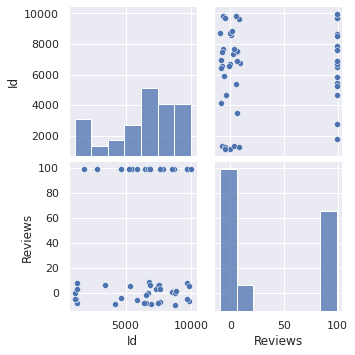

In [8]:
#Data visualistaion
sns.pairplot(movies)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer #term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus
# Creating a Tfidf Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 


In [10]:
# Preparing the Tfidf matrix by fitting and transforming
tfidf_matrix = tfidf.fit_transform(movies.Category)   #Transform a count matrix to a normalized tf or tf-idf representation
tfidf_matrix.shape #51, 34

(51, 34)

In [11]:
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

# creating a mapping of anime name to index number 
movies_index = pd.Series(movies.index, index = movies['Titles']).drop_duplicates()

Id = movies_index["Toy Story (1995)"]
Id

0

In [12]:
#Function for recommendation  by calculating the cosine scores
def get_recommendations(Name, topN):    
    # topN = 10
    # Getting the movie index using its title 
    Id = movies_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[Id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    
    # Get the scores of top N most similar movies 
    cosine_scores_N = cosine_scores[0: topN+1]
    
    # Getting the movie index 
    movies_idx  =  [i[0] for i in cosine_scores_N]
    movies_scores =  [i[1] for i in cosine_scores_N]
    
    # Similar movies and scores
    movies_similar_show = pd.DataFrame(columns=["Titles", "Score"])
    movies_similar_show["Titles"] = movies.loc[movies_idx, "Titles"]
    movies_similar_show["Score"] = movies_scores
    movies_similar_show.reset_index(inplace = True)  
    # anime_similar_show.drop(["index"], axis=1, inplace=True)
    print (movies_similar_show)
    # return (anime_similar_show)

In [13]:
# Enter your movies and number of movies's to be recommended 
get_recommendations("Toy Story (1995)", topN = 10)
#Here is movies recommendation you can choose any movie and also how many movies you need to be recommended

    index                              Titles     Score
0       0                    Toy Story (1995)  1.000000
1      25                      Othello (1995)  0.625943
2      16        Sense and Sensibility (1995)  0.582304
3      11  Dracula: Dead and Loving It (1995)  0.580356
4      10      American President, The (1995)  0.541779
5      45        When Night Is Falling (1995)  0.523595
6      39                  Restoration (1995)  0.515318
7      35                     Clueless (1995)  0.474735
8      15                       Casino (1995)  0.432793
9       5                         Heat (1995)  0.423596
10     14             Cutthroat Island (1995)  0.423596
